In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam

In [ ]:
(x_train, y_tr), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
autoencoder = Sequential()
autoencoder.add(Dense(512, activation="elu", input_shape=(784,)))
autoencoder.add(Dense(128, activation="elu"))
autoencoder.add(Dense(10, activation="linear",name="latinVector"))
autoencoder.add(Dense(128, activation="elu"))
autoencoder.add(Dense(512, activation="elu"))
autoencoder.add(Dense(784, activation="sigmoid"))

autoencoder.compile(loss='mean_squared_error', optimizer=Adam())

In [ ]:
model = autoencoder.fit(x_train,x_train, batch_size=1024, epochs=10, verbose=1,
                        validation_data=(val_x, val_x))

Epoch 1/10
59/59 [==============================] - 3s 11ms/step - loss: 0.1076 - val_loss: 0.0507
Epoch 2/10
59/59 [==============================] - 1s 9ms/step - loss: 0.0475 - val_loss: 0.0378
Epoch 3/10
59/59 [==============================] - 0s 8ms/step - loss: 0.0363 - val_loss: 0.0310
Epoch 4/10
59/59 [==============================] - 0s 8ms/step - loss: 0.0303 - val_loss: 0.0274
Epoch 5/10
59/59 [==============================] - 0s 8ms/step - loss: 0.0271 - val_loss: 0.0248
Epoch 6/10
59/59 [==============================] - 1s 9ms/step - loss: 0.0248 - val_loss: 0.0232
Epoch 7/10
59/59 [==============================] - 0s 8ms/step - loss: 0.0233 - val_loss: 0.0222
Epoch 8/10
59/59 [==============================] - 0s 8ms/step - loss: 0.0223 - val_loss: 0.0212
Epoch 9/10
59/59 [==============================] - 0s 8ms/step - loss: 0.0213 - val_loss: 0.0203
Epoch 10/10
59/59 [==============================] - 0s 8ms/step - loss: 0.0205 - val_loss: 0.0196


In [ ]:
encoder = Model(autoencoder.input, autoencoder.get_layer('latinVector').output)
encoded_data = encoder.predict(x_train)
encoding_dim = 10

In [ ]:
# Return Decoder 
encode_input = Input(shape=(encoding_dim,))

decoder = autoencoder.layers[-3](encode_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encode_input,decoder)


In [ ]:
%matplotlib inline
from keras.preprocessing import image

img = image.load_img('/content/cat.jpg', target_size=(28,28), color_mode='grayscale')
input_img = image.img_to_array(img)
print(input_img.shape)
inputs = input_img.reshape(1,784) / 255

target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

(28, 28, 1)
[14.4620905]


In [ ]:
inputs = x_train[0].reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

[5.6998628]


## Denoising Autoencoder

In [42]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras import optimizers
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [43]:
(x_train, y_tr), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28,28,1) / 255
val_x = x_test.reshape(10000, 28,28,1) / 255

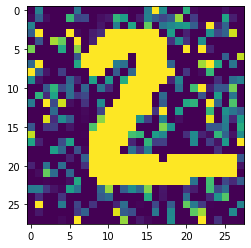

In [44]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.,1)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.imshow(x_test_noisy[1].reshape(28,28))

In [45]:
input_img = Input(shape=(28,28,1))
nn = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2,2), padding='same')(nn)
nn = Conv2D(32, (3,3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2,2), padding='same')(nn)

In [46]:

nn = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2,2))(nn)
nn = Conv2D(32, (3,3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2,2))(nn)

decoded = Conv2D(1, (3,3), padding='same', activation='sigmoid')(nn)

In [47]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=265, validation_data=(x_test_noisy, x_test))

Epoch 1/50
227/227 [==============================] - 32s 17ms/step - loss: 0.6582 - val_loss: 9.7401
Epoch 2/50
227/227 [==============================] - 3s 15ms/step - loss: 0.6432 - val_loss: 13.6288
Epoch 3/50
227/227 [==============================] - 3s 15ms/step - loss: 0.6223 - val_loss: 19.6531
Epoch 4/50
227/227 [==============================] - 3s 15ms/step - loss: 0.5940 - val_loss: 28.7671
Epoch 5/50
227/227 [==============================] - 4s 15ms/step - loss: 0.5598 - val_loss: 41.6443
Epoch 6/50
227/227 [==============================] - 4s 16ms/step - loss: 0.5289 - val_loss: 54.1356
Epoch 7/50
227/227 [==============================] - 3s 15ms/step - loss: 0.5124 - val_loss: 61.9407
Epoch 8/50
227/227 [==============================] - 3s 15ms/step - loss: 0.5039 - val_loss: 65.1770
Epoch 9/50
227/227 [==============================] - 3s 15ms/step - loss: 0.4982 - val_loss: 66.0713
Epoch 10/50
227/227 [==============================] - 3s 15ms/step - loss: 0.4937

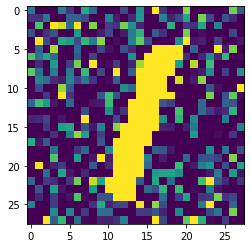

In [58]:
plt.imshow(x_test_noisy[5].reshape(28,28))

In [59]:
result = autoencoder.predict(x_test[5].reshape(1,28,28,1))

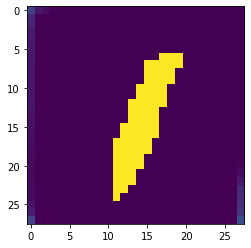

In [60]:
plt.imshow(result.reshape(28,28))